# Multi Angle illumination demo

## remove shadows by computing pixel wise maximum value accross multiple images

In [64]:
from picamera2 import Picamera2
try:
    cam
except NameError:
    pass
else:
    cam.close()
cam = Picamera2()
cam.start(show_preview=True)

[1:29:44.943183770] [3683]  INFO Camera camera_manager.cpp:325 libcamera v0.3.2+27-7330f29b
[1:29:44.950677047] [5991]  INFO RPI pisp.cpp:695 libpisp version v1.0.7 28196ed6edcf 29-08-2024 (16:33:32)
[1:29:44.962114102] [5991]  INFO RPI pisp.cpp:1154 Registered camera /base/axi/pcie@120000/rp1/i2c@88000/imx219@10 to CFE device /dev/media1 and ISP device /dev/media0 using PiSP variant BCM2712_C0
[1:29:44.965269392] [3683]  INFO Camera camera.cpp:1197 configuring streams: (0) 640x480-XBGR8888 (1) 640x480-BGGR_PISP_COMP1
[1:29:44.965379022] [5991]  INFO RPI pisp.cpp:1450 Sensor: /base/axi/pcie@120000/rp1/i2c@88000/imx219@10 - Selected sensor format: 640x480-SBGGR10_1X10 - Selected CFE format: 640x480-PC1B


In [12]:
cam.set_controls({'AwbEnable':True,'AeEnable':False})
cam.set_controls({'ExposureTime':10000, 'AnalogueGain':3.0})

In [60]:
from enderscope import SerialUtils, EnderLights, Stage
import matplotlib.pyplot as plt
import numpy as np
import time
# list available serial ports

In [ ]:
ports = SerialUtils.serial_ports()
print (ports)

['/dev/ttyAMA10', '/dev/ttyACM0', '/dev/ttyUSB0']


In [5]:
lightport = ports[1]
stageport = ports[2]
s = Stage(stageport, 115200)
l = EnderLights(lightport, baud_rate=57600)
s.home()

In [61]:
s.move_position([55,75,22])
l.shutter(True)
l.color(0,25,0)

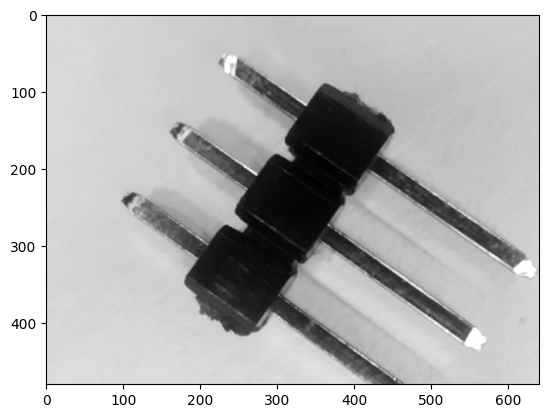

In [62]:
# mode 1 uses quarter ring patterns
l.mode(1)
l.shutter(True)
patterns=[0b0001,0b0010,0b0100,0b1000]
images=[]
result = []
i = 0
for p in patterns:
    l.parameter(p)
    time.sleep(0.1)
    img = cam.capture_array("main")
    green = np.float32(img[:,:,1])
    images.append(green)
    if i == 0 :
        result = images[i]
    else :
        result = np.maximum(result,images[i])
    i = i + 1
l.shutter(False)
imgplot = plt.imshow(result, cmap="gray")

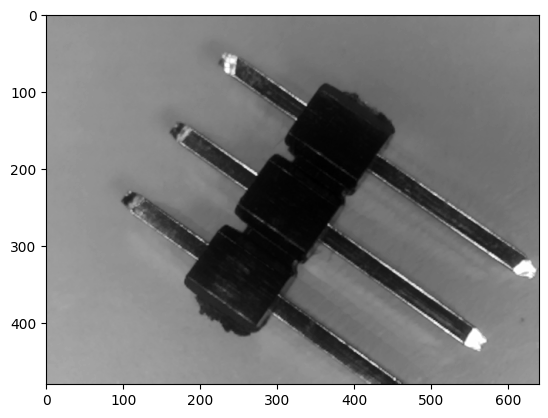

In [59]:
l.color(0,25,0)
# test with more angles
l.mode(2)
l.parameter(1)
l.shutter(True)
patterns=range(13)
images=[]
result = []
i = 0
for p in patterns:
    l.parameter(p)
    time.sleep(0.1)
    img = cam.capture_array("main")
    green = np.float32(img[:,:,1])
    images.append(green)
    if i == 0 :
        result = images[i]
    else :
        result = np.maximum(result,images[i])
    i = i + 1
l.shutter(False)
imgplot = plt.imshow(result, cmap="gray")